# Import Library

In [10]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Link to Google Drive

In [11]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# Read data

In [12]:
data = pd.read_csv('german_credit_data.csv')
data.drop('Unnamed: 0', axis=1, inplace = True)
original_data = data.copy()
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# EDA

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [14]:
data.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [15]:
# column_need_to_change_to_category = ['Sex', 'Job', 'Housing', 'Saving accounts','Checking account','Purpose', 'Risk']
# for c in column_need_to_change_to_category:
#   data[c] = data[c].astype('category')

In [16]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Phân tích giới tính:
Trong phần này, phân tích phần giới tính trong bộ dữ liệu.

Mục tiêu:

Tìm phân phối giới tính trong tập dữ liệu.
Xem phân phối trong từng giới tính theo độ tuổi (Ví dụ: số lượng nam thanh niên cao hơn nữ)
Những lý do chính của ứng dụng cho một khoản vay tín dụng là gì? Nó có thay đổi theo giới tính không?
Mỗi giới có bao nhiêu công việc? Có bao nhiêu người thất nghiệp?
Tóm lược:

Số lượng nam giới nhiều hơn nữ giới gấp 2 lần trong tập dữ liệu.
Hầu hết phụ nữ đăng ký vay tín dụng đều dưới 30 tuổi.
Hầu hết nam giới đăng ký vay nằm trong độ tuổi từ 20-40
Phụ nữ có nhiều khả năng đăng ký vay tín dụng để mua đồ đạc và thiết bị hơn. (10% nhiều hơn so với nam giới)
Nam giới đăng ký vay tín dụng nhiều hơn gấp 2 lần so với nữ giới để đầu tư vào kinh doanh.
Nữ giới thất nghiệp gấp 2 lần so với nam giới.
Nam giới làm 3 công việc gấp 2 lần so với nữ giới.
Hầu hết những người đăng ký vay tín dụng đều có hai công việc!

In [17]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'O']

for col in cat_cols:
    print(data[col].value_counts(), "\n\n")

male      690
female    310
Name: Sex, dtype: int64 


own     713
rent    179
free    108
Name: Housing, dtype: int64 


little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64 


little      274
moderate    269
rich         63
Name: Checking account, dtype: int64 


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64 


good    700
bad     300
Name: Risk, dtype: int64 




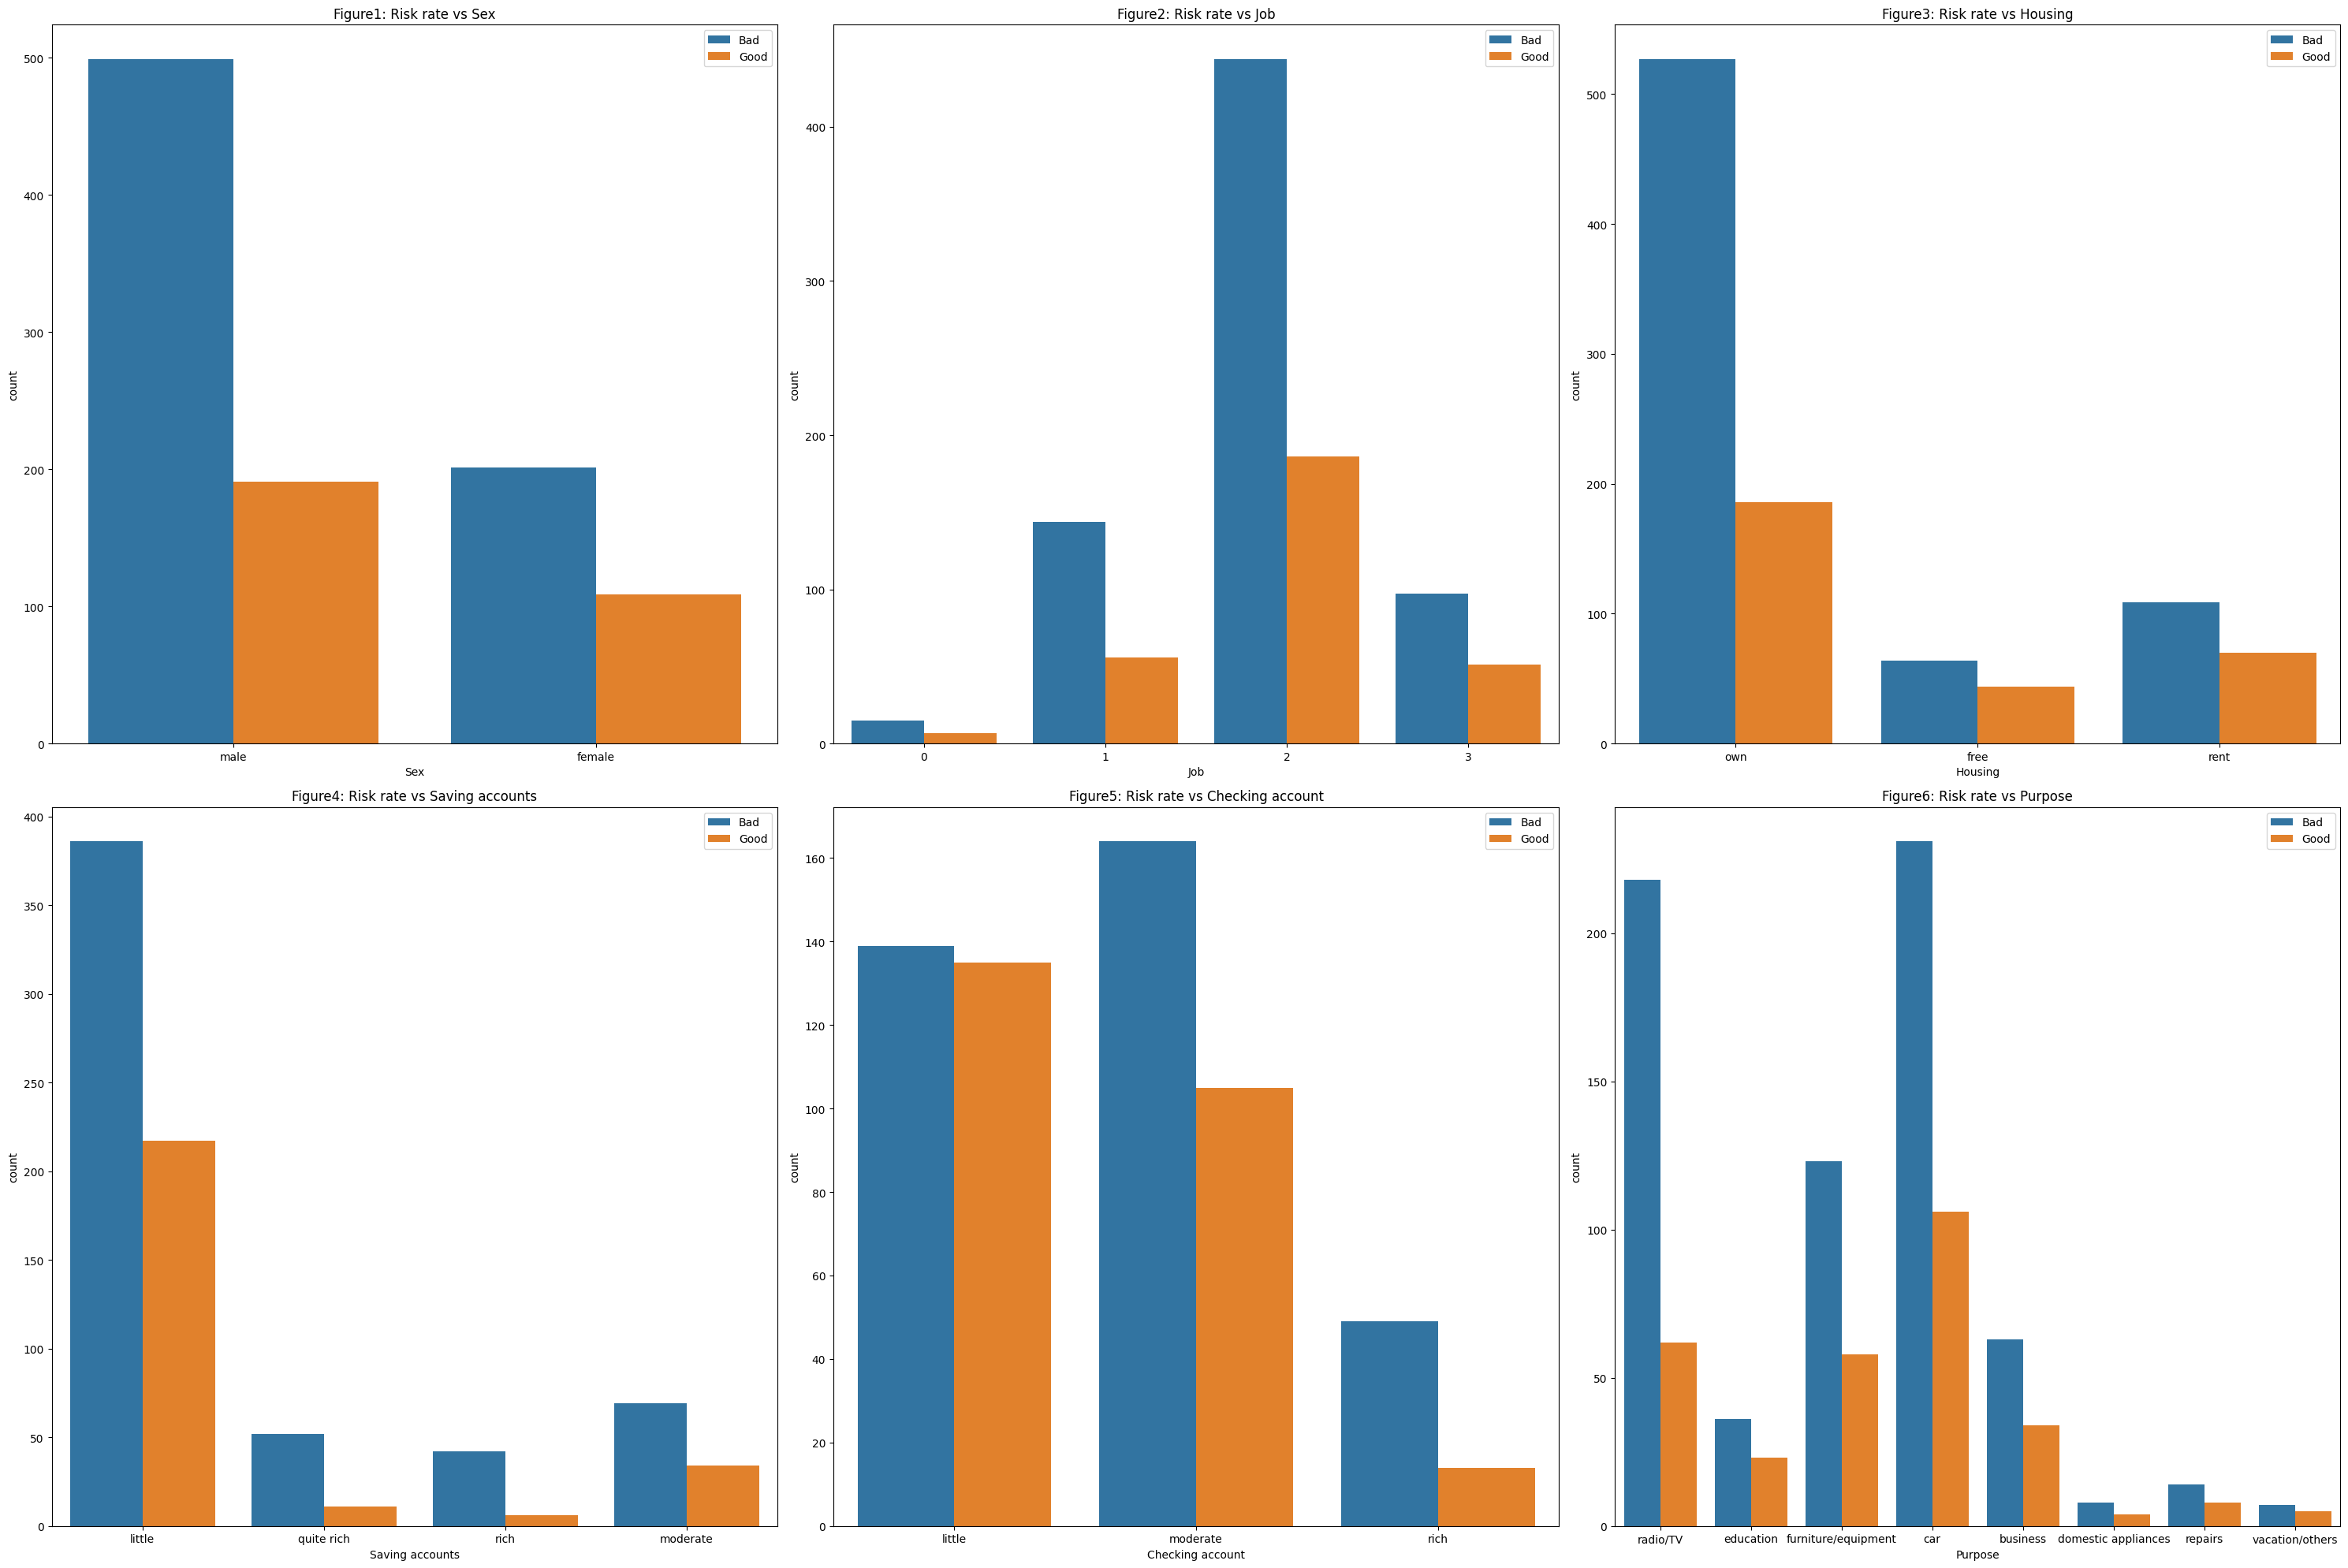

In [18]:
cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*10, n_rows*10))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r * n_cols + c 
    if i < len(cols):
      ax_i = ax[r, c]
      sns.countplot(data = data, x = cols[i], hue = 'Risk', ax = ax_i)
      ax_i.set_title(f"Figure{i+1}: Risk rate vs {cols[i]}")
      ax_i.legend(title = '', loc = 'upper right', labels = ['Bad', 'Good'])

plt.tight_layout()
plt.show()

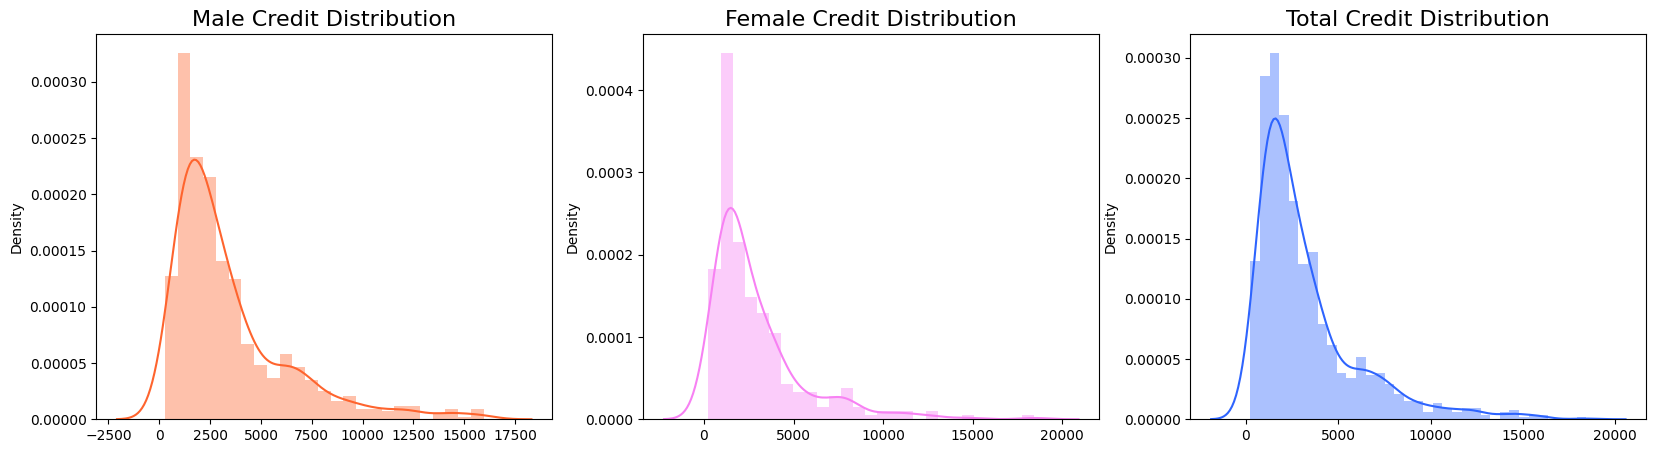

In [19]:
male_credit = data["Credit amount"].loc[data["Sex"] == "male"].values
female_credit = data["Credit amount"].loc[data["Sex"] == "female"].values
total_credit = data['Credit amount'].values

fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

In [20]:
#aspect=2,
plt.figure(figsize=(28,13))
data['Credit_amount'] = np.array(int(i/300) for i in data['Credit amount'] )
sns.catplot("Credit_amount", data=data,aspect=2, palette='hls',  kind="count",hue = 'Sex')
del data['Credit_amount']

TypeError: catplot() got multiple values for argument 'data'

<Figure size 2800x1300 with 0 Axes>

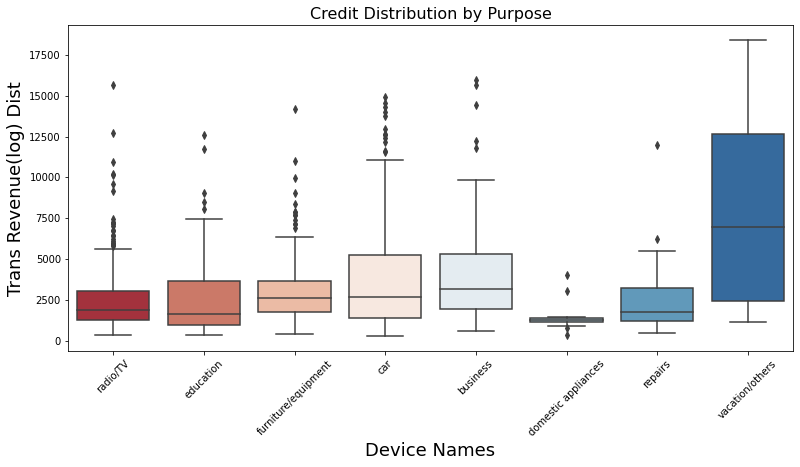

In [ ]:
plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit amount', 
                   data=data, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

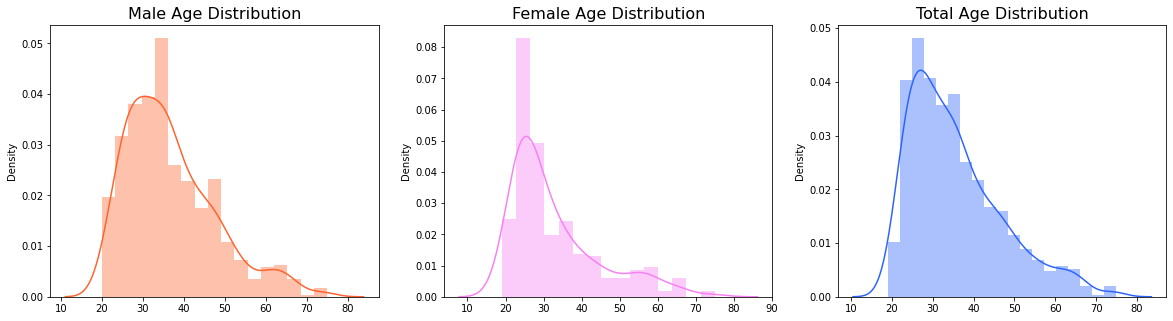

In [ ]:
#, bins= 7
#sns.distplot(data['Age'])
male_Age = data["Age"].loc[data["Sex"] == "male"].values
female_Age = data["Age"].loc[data["Sex"] == "female"].values
total_Age = data['Age'].values

fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(male_Age, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Age Distribution", fontsize=16)
sns.distplot(female_Age, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Age Distribution", fontsize=16)
sns.distplot(total_Age, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Age Distribution", fontsize=16)
plt.show()

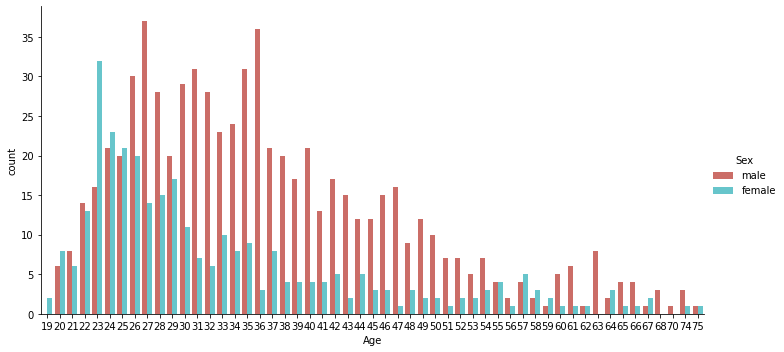

In [ ]:
sns.catplot(x = "Age", data=data, aspect=2, kind="count", palette='hls',hue = 'Sex')

In [ ]:
data["Purpose"].unique()
sex_purpose = pd.crosstab(data['Purpose'], data['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [ ]:
# m_purpose = sex_purpose['male'].values.tolist()
# f_purpose = sex_purpose['female'].values.tolist()

# # Round values
# male_purpose = ['%.2f' % elem for elem in m_purpose]
# female_purpose = ['%.2f' % elem for elem in f_purpose]

# male = go.Bar(
#     y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
#       'radio/TV', 'repairs', 'vacation/others'],
#     x=male_purpose,
#     name='German Males',
#     text='(%)',
#     orientation = 'h',
#     marker = dict(
#         color = 'rgba(72, 92, 238, 0.6)',
#         line = dict(
#             color = 'rgba(72, 92, 238, 1.0)',
#             width = 3)
#     )
# )
# female = go.Bar(
#     y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
#       'radio/TV', 'repairs', 'vacation/others'],
#     x=female_purpose,
#     name='German Females',
#     text='(%)',
#     orientation = 'h',
#     marker = dict(
#         color = 'rgba(217, 128, 234, 0.6)',
#         line = dict(
#             color = 'rgba(217, 128, 234, 1.0)',
#             width = 3)
#     )
# )

# data = [male, female]
# layout = dict(
#     title='Application Reasons for a Loan by Gender',
#      xaxis=dict(
#         title='(% of Gender)',
#         titlefont=dict(
#             family='Arial, sans-serif',
#             size=11,
#             color='black'
#         ),
#         showticklabels=True,
#         tickangle=45,
#         tickfont=dict(
#             family='Old Standard TT, serif',
#             size=14,
#             color='black'
#         ),
#         exponentformat='e',
#         showexponent='all'
#     ),
#     yaxis=dict(
#         title='Purpose for the Loan',
#         titlefont=dict(
#             family='Arial, sans-serif',
#             size=11,
#             color='black'
#         ),
#         showticklabels=True,
#         tickangle=40,
#         tickfont=dict(
#             family='Old Standard TT, serif',
#             size=10,
#             color='black'
#         ),
#         exponentformat='e',
#         showexponent='all'
#     ),
#     barmode='stack'
# )

# fig = dict(data=data, layout=layout)
# iplot(fig, filename='marker-h-bar')

In [ ]:
number_of_jobs = pd.crosstab(data["Job"], data["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


Nhóm tuổi:
Trong phần này, sẽ tạo các nhóm phân loại dựa trên cột tuổi. Các biến phân loại sau đây sẽ thuộc về cột "Age_Group":

Young: Độ tuổi của khách hàng dao động từ (19 - 29).
Young Adults: Độ tuổi của khách hàng dao động từ (30-40)
Senior: Độ tuổi của khách hàng dao động từ (41-55)
Elder: Tuổi của khách hàng trên 55 tuổi
Những gì nhóm muốn thực hiện:
Tạo các nhóm tuổi khác nhau dựa trên tuổi của họ.
Xem số tiền Tín dụng mà khách hàng đã vay theo từng nhóm tuổi.
Tìm hiểu sâu hơn về phân tích của nhóm và xác định khoản vay nào có rủi ro cao và xem liệu có bất kỳ mô hình nào liên quan đến các nhóm tuổi hay không.
Tóm lược:
Nhóm tuổi trẻ hơn có xu hướng yêu cầu khoản vay cao hơn một chút so với nhóm tuổi lớn hơn.
Nhóm young và elederly có tỷ lệ cho vay rủi ro cao cao nhất. Với 45,29% khách hàng thuộc nhóm tuổi trẻ (young) được coi là có nguy cơ rủi ro cao.
Số khoản vay được cho là rủi ro cao của nhóm người cao tuổi (elderly) là 44,28% tổng số tiền được cho là của nhóm người cao tuổi(elderly).
Đây là những nhóm có nhiều khả năng thất nghiệp hoặc làm việc bán thời gian nhất, vì nhóm trẻ nhất (young) không có kinh nghiệm để có việc làm hoặc họ đang học đại học nên họ không có đủ thời gian để tìm việc,làm việc toàn thời gian.
Về phía nhóm người cao tuổi(elderly), đây là nhóm có nhiều khả năng nhận được tiền từ lương hưu nhất, nghĩa là nhóm người cao tuổi(elderly) hầu như thất nghiệp hoặc làm việc bán thời gian.

In [ ]:
data['Age_Group'] = np.nan

lst = [data]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [ ]:
# young = data['Credit amount'].loc[data['Age_Group'] == 'Young'].values.tolist()
# young_adults = data['Credit amount'].loc[data['Age_Group'] == 'Young Adults'].values.tolist()
# senior = data['Credit amount'].loc[data['Age_Group'] == 'Senior'].values.tolist()
# elder_credit = data['Credit amount'].loc[data['Age_Group'] == 'Elder'].values.tolist()

# # Create the box plots by age category
# young_credit = go.Box(
#     y = young,
#     name = "Young",
#     jitter = 0.3,
#     pointpos = -1.8,
#     boxpoints = 'all',
#     marker = dict(
#         color = 'rgb(150, 198, 109)'),
#     line = dict(
#         color = 'rgb(111, 200, 37)')
# )

# young_adults_credit = go.Box(
#     y = young_adults,
#     name = "Young Adults",
#     jitter = 0.3,
#     pointpos = -1.8,
#     boxpoints = 'all',
#     marker = dict(
#         color = 'rgb(124, 236, 212)'),
#     line = dict(
#         color = 'rgb(38, 214, 177)')
# )

# senior_credit = go.Box(
#     y = senior,
#     name = "Seniors",
#     jitter = 0.3,
#     pointpos = -1.8,
#     boxpoints = 'all',
#     marker = dict(
#         color = 'rgb(241, 93, 93)'),
#     line = dict(
#         color = 'rgb(225, 44, 44)')
# )

# elder_credit = go.Box(
#     y = elder_credit,
#     name = "Elders",
#     jitter = 0.3,
#     pointpos = -1.8,
#     boxpoints = 'all',
#     marker = dict(
#         color = 'rgb(180, 121, 72)'),
#     line = dict(
#         color = 'rgb(115, 77, 46)')
# )

# data = [young_credit, young_adults_credit, senior_credit, elder_credit]

# layout = dict(
#     title="Credit Amount by Age Group Segment", 
#     xaxis = dict(title="Age Group"),
#     yaxis= dict(title="Credit Amount")
# )

# fig = dict(data=data, layout=layout)
# iplot(fig, filename="Box Plot")

In [ ]:
good_credit_data = data.loc[data['Risk'] == "good"]
bad_credit_data = data.loc[data['Risk'] == "bad"]

good_credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [ ]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_data['Age_Group'],
            "y": good_credit_data['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(34, 178, 178)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_data['Age_Group'],
            "y": bad_credit_data['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(178, 34, 34)'
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit Borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename = 'Age-Housing', validate=False)

In [ ]:
# young_good = data['Credit amount'].loc[(data['Age_Group'] == 'Young') & (data['Risk'] == 'good')].sum()
# young_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Young') & (data['Risk'] == 'bad')].sum()
# young_adult_good = data['Credit amount'].loc[(data['Age_Group'] == 'Young Adults') & (data['Risk'] == 'good')].sum()
# young_adult_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Young Adults') & (data['Risk'] == 'bad')].sum()
# senior_good = data['Credit amount'].loc[(data['Age_Group'] == 'Senior') & (data['Risk'] == 'good')].sum()
# senior_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Senior') & (data['Risk'] == 'bad')].sum()
# elder_good = data['Credit amount'].loc[(data['Age_Group'] == 'Elder') & (data['Risk'] == 'good')].sum()
# elder_bad = data['Credit amount'].loc[(data['Age_Group'] == 'Elder') & (data['Risk'] == 'bad')].sum()

# # Percents
# young_good_p = young_good/(young_good + young_bad) * 100
# young_bad_p = young_bad/(young_good + young_bad) * 100
# young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
# young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
# senior_good_p = senior_good/(senior_good + senior_bad) * 100
# senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
# elder_good_p = elder_good/(elder_good + elder_bad) * 100
# elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# # Round Percents
# young_good_p = str(round(young_good_p, 2))
# young_bad_p = str(round(young_bad_p, 2))
# young_adult_good_p = str(round(young_adult_good_p, 2))
# young_adult_bad_p = str(round(young_adult_bad_p, 2))
# senior_good_p = str(round(senior_good_p, 2))
# senior_bad_p = str(round(senior_bad_p, 2))
# elder_good_p = str(round(elder_good_p, 2))
# elder_bad_p = str(round(elder_bad_p, 2))



# x = ["Young", "Young Adults", "Senior", "Elder"]

# good_loans = go.Bar(
#     x=x,
#     y=[young_good, young_adult_good, senior_good, elder_good],
#     name="Good Loans",
#     text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
#     textposition = 'auto',
#     marker=dict(
#         color='rgb(111, 235, 146)',
#         line=dict(
#             color='rgb(60, 199, 100)',
#             width=1.5),
#         ),
#     opacity=0.6
# )

# bad_loans =  go.Bar(
#     x=x,
#     y=[young_bad, young_adult_bad, senior_bad, elder_bad],
#     name="Bad Loans",
#     text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
#     textposition = 'auto',
#     marker=dict(
#         color='rgb(247, 98, 98)',
#         line=dict(
#             color='rgb(225, 56, 56)',
#             width=1.5),
#         ),
#     opacity=0.6
# )

# data = [good_loans, bad_loans]

# layout = dict(
#     title="Type of Loan by Age Group", 
#     xaxis = dict(title="Age Group"),
#     yaxis= dict(title="Credit Amount")
# )

# fig = dict(data=data, layout=layout)

# iplot(fig, filename='grouped-bar-direct-labels')

Phân tích sự giàu có:
Trong phần này, sẽ phân tích lượng tài sản mà khách hàng có bằng cách phân tích tài khoản séc của họ và liệu tình trạng tài sản của khách hàng có góp phần gây ra rủi ro cho các khoản vay đang cấp cho khách hàng hay không.

Tóm lược:
Các cá nhân thuộc nhóm “ít giàu” (little wealth) có xác suất bị rủi ro nợ xấu cao hơn so với các nhóm đối tượng khác.
Sự giàu có càng cao thì xác suất trở thành khoản vay có rủi ro khó đòi càng thấp.

In [ ]:
data["Checking account"].unique()
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')